In [116]:
import scipy.special
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from chaospy.quadrature import clenshaw_curtis


In [118]:
clenshaw_curtis(9,(-1,1))

(array([[-1.        , -0.93969262, -0.76604444, -0.5       , -0.17364818,
          0.17364818,  0.5       ,  0.76604444,  0.93969262,  1.        ]]),
 array([0.01234568, 0.11656746, 0.22528432, 0.30194004, 0.34386251,
        0.34386251, 0.30194004, 0.22528432, 0.11656746, 0.01234568]))

In [120]:
clenshaw_curtis(11,(-1,1))[0]

array([[-1.        , -0.95949297, -0.84125353, -0.65486073, -0.41541501,
        -0.14231484,  0.14231484,  0.41541501,  0.65486073,  0.84125353,
         0.95949297,  1.        ]])

In [123]:
import numpy as np

def clenshaw_curtis_nodes_weights(n):
    """
    Compute the Clenshaw-Curtis quadrature nodes and weights on the interval [-1, 1].
    
    Parameters:
    n (int): The number of nodes/points.
    
    Returns:
    x (ndarray): The quadrature nodes on [-1, 1].
    w (ndarray): The corresponding weights.
    """
    if (n==2):
        w = np.array([1.,1.])
        x = np.array([-1.,1.])
    elif (n==4):
        w = np.array([0.1111111111111111111, 0.8888888888888888889, 0.8888888888888888889, 0.1111111111111111111])
        x = np.array([-1.0000000000000000000, -0.5000000000000000000, 0.5000000000000000000, 1.0000000000000000000])
    elif (n==6):
        w = np.array([0.040000000000000000, 0.3607430412000112162, 0.5992569587999887838, 
                      0.5992569587999887838, 0.3607430412000112162, 0.040000000000000000])
        x = np.array([-1.0000000000000000000, -0.8090169943749474241,-0.3090169943749474241,
                      0.3090169943749474241, 0.8090169943749474241, 1.0000000000000000000])
    elif (n==10):
        x = np.array([-1.0000000000000000000, -0.9396926207859083841, -0.7660444431189780352, 
                      -0.5000000000000000000, -0.1736481776669303489, 0.1736481776669303489, 
                      0.5000000000000000000, 0.7660444431189780352, 0.9396926207859083841, 1.0000000000000000000])
        w = np.array([0.012345679012345679, 0.1165674565720371230, 0.2252843233381044081, 
                      0.3019400352733686067, 0.3438625058041441832, 0.3438625058041441832, 0.3019400352733686067, 
                      0.2252843233381044081, 0.1165674565720371230, 0.012345679012345679])
    elif (n==16):
        x = np.array([-1.0000000000000000000, -0.9781476007338056379, -0.9135454576426008955, 
                      -0.8090169943749474241, -0.6691306063588582138, -0.5000000000000000000, 
                      -0.3090169943749474241, -0.1045284632676534714, 0.1045284632676534714, 
                      0.3090169943749474241, 0.5000000000000000000, 0.6691306063588582138, 
                      0.8090169943749474241, 0.9135454576426008955, 0.9781476007338056379, 1.0000000000000000000])
        w = np.array([0.00444444444444444, 0.0425147662475250899, 0.0855388402593328829, 
                      0.1229401008284936153, 0.1557331760396736918, 0.1813297813297813298, 
                      0.1992147813263885396, 0.2082841095243604063, 0.2082841095243604063, 
                      0.1992147813263885396, 0.1813297813297813298, 0.1557331760396736918, 
                      0.1229401008284936153, 0.0855388402593328829, 0.0425147662475250899, 0.00444444444444444])
    elif (n==46):
        x = np.array([-1.0000000000000000000, -0.9975640502598242476, -0.9902680687415703151, 
                      -0.9781476007338056379, -0.9612616959383188619, -0.9396926207859083841, 
                      -0.9135454576426008955, -0.8829475928589269420, -0.8480480961564259704, 
                      -0.8090169943749474241, -0.7660444431189780352, -0.7193398003386511394, 
                      -0.6691306063588582138, -0.6156614753256582797, -0.5591929034707468302, 
                      -0.5000000000000000000, -0.4383711467890774175, -0.3746065934159120354,
                      -0.3090169943749474241, -0.2419218955996677226, -0.1736481776669303489, 
                      -0.1045284632676534714, -0.0348994967025009716, 0.0348994967025009716, 
                      0.1045284632676534714, 0.1736481776669303489, 0.2419218955996677226, 
                      0.3090169943749474241, 0.3746065934159120354, 0.4383711467890774175, 
                      0.5000000000000000000, 0.5591929034707468302, 0.6156614753256582797, 
                      0.6691306063588582138, 0.7193398003386511394, 0.7660444431189780352, 
                      0.8090169943749474241, 0.8480480961564259704, 0.8829475928589269420, 
                      0.9135454576426008955, 0.9396926207859083841, 0.9612616959383188619, 
                      0.9781476007338056379, 0.9902680687415703151, 0.9975640502598242476, 1.0000000000000000000])
        w = np.array([0.0004938271604938, 0.0047546857890784185, 0.0097563827049905178, 
                      0.0144952225041985499, 0.0192546570295108462, 0.02387001749850450440, 0.0284007921430443066, 0.0327714822180152092, 0.0369982356967542011, 
                      0.04103290105630688662, 0.04487682754253924529, 
                      0.04849486346395686785, 0.0518824678405191346, 
                      0.05501256882062859726, 0.05787852950023088415, 
                      0.06045933230212314279, 0.06274818815385574941, 
                      0.06472922113844488516, 0.06639660207503392583, 
                      0.06773917098341607432, 0.06875272509457971451, 
                      0.06943062355009335223, 0.06977067573368115926, 
                      0.06977067573368115926, 0.06943062355009335223, 
                      0.06875272509457971451, 0.06773917098341607432, 
                      0.06639660207503392583, 0.06472922113844488516, 
                      0.06274818815385574941, 0.06045933230212314279, 
                      0.05787852950023088415, 0.05501256882062859726, 
                      0.0518824678405191346, 0.04849486346395686785, 
                      0.04487682754253924529, 0.04103290105630688662, 
                      0.0369982356967542011, 0.0327714822180152092, 0.0284007921430443066, 
                      0.02387001749850450440, 0.0192546570295108462, 0.0144952225041985499,
                      0.0097563827049905178, 0.0047546857890784185, 0.0004938271604938])
    elif (n==136):
        x = np.array([-1.0000000000000000000, -0.9997292411794616822, -0.9989171113385245273, -0.9975640502598242476, \
                        -0.9956707906498044135, -0.9932383577419429885, -0.9902680687415703151, -0.9867615321125791908, -0.9827206467064132957, -0.9781476007338056379, \
                        -0.9730448705798238388, -0.9674152194628639333, -0.9612616959383188619, -0.9545876322477319459, -0.9473966425143293071, -0.9396926207859083841, \
                        -0.9314797389261423544, -0.9227624443554423596, -0.9135454576426008955, -0.9038337699485205346, 
                        -0.8936326403234122482, -0.8829475928589269420, -0.8717844136967623760, -0.8601491478953653614, 
                        -0.8480480961564259704, -0.8354878114129364197, -0.8224750952806622546, -0.8090169943749474241, 
                        -0.7951207964948477623, -0.7807940266766592349, 
                        -0.7660444431189780352, -0.7508800329814991816, 
                        -0.7353090080598286401, -0.7193398003386511394, 
                        -0.7029810574256617142, -0.6862416378687335857, 
                        -0.6691306063588582138, -0.6516572288214552142, 
                        -0.6338309673987102827, -0.6156614753256582797, 
                        -0.5971585917027861649, -0.5783323361679865115, 
                        -0.5591929034707468302, -0.5397506579515128752, 
                        -0.5200161279292154550, -0.5000000000000000000, 
                        -0.4797131132502462272, -0.4591664533870116521, 
                        -0.4383711467890774175, -0.4173384544818179020, 
                        -0.3960797660391568237, -0.3746065934159120354, 
                        -0.3529305647138689081, -0.3310634178849580816, 
                        -0.3090169943749474241, -0.2868032327110902531, 
                        -0.2644341620372022191, -0.2419218955996677226, 
                        -0.2192786241879033058, -0.1965166095328301256, 
                        -0.1736481776669303489, -0.1506857122494831195, 
                        -0.1276416478605945973, -0.1045284632676534714, 
                        -0.0813586746678582800, -0.0581448289104758285, 
                        -0.0348994967025009716, -0.0116352658013970146, 
                        0.0116352658013970146, 0.0348994967025009716, 0.0581448289104758285, 
                        0.0813586746678582800, 0.1045284632676534714, 0.1276416478605945973, 
                        0.1506857122494831195, 0.1736481776669303489, 0.1965166095328301256, 
                        0.2192786241879033058, 0.2419218955996677226, 0.2644341620372022191, 
                        0.2868032327110902531, 0.3090169943749474241, 0.3310634178849580816, 
                        0.3529305647138689081, 0.3746065934159120354, 0.3960797660391568237, 
                        0.4173384544818179020, 0.4383711467890774175, 0.4591664533870116521, 
                        0.4797131132502462272, 0.5000000000000000000, 0.5200161279292154550, 
                        0.5397506579515128752, 0.5591929034707468302, 0.5783323361679865115, 
                        0.5971585917027861649, 0.6156614753256582797, 0.6338309673987102827, 
                        0.6516572288214552142, 0.6691306063588582138, 0.6862416378687335857, 
                        0.7029810574256617142, 0.7193398003386511394, 0.7353090080598286401, 
                        0.7508800329814991816, 0.7660444431189780352, 0.7807940266766592349, 
                        0.7951207964948477623, 0.8090169943749474241, 0.8224750952806622546, 
                        0.8354878114129364197, 0.8480480961564259704, 0.8601491478953653614, 
                        0.8717844136967623760, 0.8829475928589269420, 0.8936326403234122482, 
                        0.9038337699485205346, 0.9135454576426008955, 0.9227624443554423596, 
                        0.9314797389261423544, 0.9396926207859083841, 0.9473966425143293071, 
                        0.9545876322477319459, 0.9612616959383188619, 0.9674152194628639333, 
                        0.9730448705798238388, 0.9781476007338056379, 0.9827206467064132957, 
                        0.9867615321125791908, 0.9902680687415703151, 0.9932383577419429885, 
                        0.9956707906498044135, 0.9975640502598242476, 0.9989171113385245273, 
                        0.9997292411794616822, 1.0000000000000000000])
        w = np.array([0.000054869684499, 0.0005286800539908704, 0.0010871804166080944, 
0.0016210975701206600, 0.0021643391532665494, 0.0027007561013478631, 
0.0032393015561725079, 0.0037736104197446093, 0.0043076936068851456, 
0.00483805618822186627, 0.00536689273308081741, 
0.0058919391640078709, 0.0064145236399494419, 0.0069330238643208527, 
0.00744828865730395608, 0.00795907392167663124, 
0.00846593665833488656, 0.00896787552491690206, 
0.00946525773351409888, 0.00995724809980724067, 
0.01044408443396448044, 0.01092505124231669536, 
0.01140029504273052796, 0.01186919029535050709, 
0.01233181753248174606, 0.01278762132636649877, 
0.01323663374205052526, 0.01367835577717007393, 
0.01411278358479737923, 0.01453946489076511523, 
0.01495836920385627255, 0.01536908395666757876, 
0.01577155903036743800, 0.01616541638974587437, 
0.01655059171879569130, 0.01692673764598937172, 
0.01729377994195404204, 0.01765139897321041374, 
0.01799951403271256463, 0.01833783099214583420, 
0.01866626546179690006, 0.01898454710226399312, 
0.01929259014256165367, 0.01959014670612527331, 
0.01987713155462743733, 0.02015331824606116231, 
0.02041862367902544574, 0.02067284204706478682, 
0.02091589373811729748, 0.02114759296003759507, 
0.02136786473411220777, 0.02157654279986561408, 
0.02177355778052189948, 0.02195876257317761349, 
0.02213209422139451857, 0.02229342449105084213, 
0.02244269753366252376, 0.02257980376236809884, 
0.02270469500843178640, 0.02281728016398652534, 
0.02291751920753302616, 0.02300533938434943894, 
0.02308070919215370688, 0.02314357413765470934, 
0.02319391152086915981, 0.02323168504618429918, 
0.02325688101489593204, 0.02326948128889774332, 
0.02326948128889774332, 0.02325688101489593204, 
0.02323168504618429918, 0.02319391152086915981, 
0.02314357413765470934, 0.02308070919215370688, 
0.02300533938434943894, 0.02291751920753302616, 
0.02281728016398652534, 0.02270469500843178640, 
0.02257980376236809884, 0.02244269753366252376, 
0.02229342449105084213, 0.02213209422139451857, 
0.02195876257317761349, 0.02177355778052189948, 
0.02157654279986561408, 0.02136786473411220777, 
0.02114759296003759507, 0.02091589373811729748, 
0.02067284204706478682, 0.02041862367902544574, 
0.02015331824606116231, 0.01987713155462743733, 
0.01959014670612527331, 0.01929259014256165367, 
0.01898454710226399312, 0.01866626546179690006, 
0.01833783099214583420, 0.01799951403271256463, 
0.01765139897321041374, 0.01729377994195404204, 
0.01692673764598937172, 0.01655059171879569130, 
0.01616541638974587437, 0.01577155903036743800, 
0.01536908395666757876, 0.01495836920385627255, 
0.01453946489076511523, 0.01411278358479737923, 
0.01367835577717007393, 0.01323663374205052526, 
0.01278762132636649877, 0.01233181753248174606, 
0.01186919029535050709, 0.01140029504273052796, 
0.01092505124231669536, 0.01044408443396448044, 
0.00995724809980724067, 0.00946525773351409888, 
0.00896787552491690206, 0.00846593665833488656, 
0.00795907392167663124, 0.00744828865730395608, 
0.0069330238643208527, 0.0064145236399494419, 0.0058919391640078709, 
0.00536689273308081741, 0.00483805618822186627, 
0.0043076936068851456, 0.0037736104197446093, 0.0032393015561725079, 
0.0027007561013478631, 0.0021643391532665494, 0.0016210975701206600, 
0.0010871804166080944, 0.0005286800539908704, 0.000054869684499])
    else:
        assert(0,"n requested not available")
    return x, w

def clenshaw_curtis_nodes_weights2(n):
    x, w= clenshaw_curtis(n-1,(-1,1))
    return x, w
    
    
    
# Example: Compute Clenshaw-Curtis quadrature rule for n=6
n = 6
nodes, weights = clenshaw_curtis_nodes_weights(n)

print("Nodes (x):", nodes)
print("Weights (w):", weights, sum(weights))
print("first moment", np.sum(weights*nodes))
print("second moment", np.sum(weights*nodes**2))

Nodes (x): [-1.         -0.80901699 -0.30901699  0.30901699  0.80901699  1.        ]
Weights (w): [0.04       0.36074304 0.59925696 0.59925696 0.36074304 0.04      ] 2.0
first moment 7.632783294297951e-17
second moment 0.6666666666666667


<>:193: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:193: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/rp/0g_84zc94fb0x5yys8v55x7m0000gq/T/ipykernel_11590/586544347.py:193: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(0,"n requested not available")


In [125]:
clenshaw_curtis_nodes_weights2(2)


(array([[-1.,  1.]]), array([1., 1.]))

In [127]:
clenshaw_curtis_nodes_weights(2)

(array([-1.,  1.]), array([1., 1.]))

In [129]:
# for i in range(50):
# #     if i+1 in [0,2,4,8,16,32,64]:
#     print(clenshaw_curtis_nodes_weights(i+1)[0], i+1 )


# # xt, wt = clenshaw_curtis(1, (-1,1))
# # xt

In [131]:
clenshaw_curtis_nodes_weights(2)[0]

array([-1.,  1.])

In [133]:
def check_nested(vals, nn):
    n_list = []
    for ix in range(vals.size,nn):
        check = True
        xs = clenshaw_curtis_nodes_weights2(ix)[0][0]
        for it in range(vals.size):
            if vals[it] not in xs:
                check = False
            if 0.0 in xs and check == True:
#                 print('0 in set', ix)
                check = False
        if check == True:
            n_list.append(ix)
#             print(vals, 'vals')
#             print(xs, 'xs')
    return np.array(n_list)
            
    
    
    
    

In [135]:
nestedvals = check_nested(clenshaw_curtis_nodes_weights2(4)[0][0], 500)

In [136]:
nestedvals

array([  4,  10,  16,  22,  28,  31,  34,  46,  58,  61,  70,  82,  94,
       100, 106, 112, 118, 121, 124, 130, 136, 148, 154, 160, 172, 178,
       184, 187, 196, 199, 202, 208, 220, 226, 232, 241, 244, 256, 262,
       274, 280, 292, 304, 310, 322, 328, 334, 340, 352, 355, 358, 370,
       373, 376, 382, 388, 397, 400, 406, 415, 418, 424, 430, 436, 439,
       448, 454, 466, 472, 478, 481, 484, 490, 496])

In [139]:
1.0

1.0

In [141]:
clenshaw_curtis_nodes_weights2(10)[0]

array([[-1.        , -0.93969262, -0.76604444, -0.5       , -0.17364818,
         0.17364818,  0.5       ,  0.76604444,  0.93969262,  1.        ]])

In [143]:
clenshaw_curtis_nodes_weights2(16)[0]



array([[-1.        , -0.9781476 , -0.91354546, -0.80901699, -0.66913061,
        -0.5       , -0.30901699, -0.10452846,  0.10452846,  0.30901699,
         0.5       ,  0.66913061,  0.80901699,  0.91354546,  0.9781476 ,
         1.        ]])

In [145]:
clenshaw_curtis_nodes_weights2(8)[0]

array([[-1.        , -0.90096887, -0.6234898 , -0.22252093,  0.22252093,
         0.6234898 ,  0.90096887,  1.        ]])

In [147]:
h = 2.**np.arange(1,-5,-1)
f = lambda x: np.arctan(x)*np.cosh(x)
S = (f(1+h/2)-f(1-h/2))/h
print(S)
tableau = wynn_epsilon(S)
print(tableau[:,2:])

[2.08265507 1.78911232 1.71800451 1.70039511 1.6960039  1.69490681]
5
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-3.40665887e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.40631522e+01  1.69527282e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-5.67878466e+01  1.69459884e+00 -1.49778349e+03  0.00000000e+00
   0.00000000e+00]
 [-2.27728014e+02  1.69454511e+00 -1.86669564e+04  1.69454060e+00
   0.00000000e+00]
 [-9.11500001e+02  1.69454143e+00 -2.72042424e+05  1.69454116e+00
   1.75706750e+06]]


In [149]:
def fill_in_sequence(ns, sq, countby):
    sequence_interpolated = interp1d(ns, sq)
    
    new_sequence = []
    new_ns = []
    count = ns[0]
    it1 = 0
    it2 = 0
    while count <= ns[-1]:

        if ns[it1] == count:
            new_sequence.append(sq[it1])
            new_ns.append(ns[it1])
            count += countby
            it1 += 1
            it2 += 1
        else:
            new_ns.append(count)
            new_sequence.append(sequence_interpolated(count))
            count += countby
            it2 += 1
    return np.array(new_ns), np.array(new_sequence)
        
    
    
    

[1.         1.03125    1.03536523 1.03634179 1.03666179 1.03679039
 1.03684989 1.03688041 1.03689734 1.03690734 1.03691355 1.03691757
 1.03692026 1.03692212 1.03692344 1.03692439 1.0369251  1.03692563
 1.03692603 1.03692634 1.03692659 1.03692678 1.03692694 1.03692706
 1.03692716 1.03692725 1.03692732 1.03692738 1.03692743]
28
[0.         0.         0.         1.03598934 1.03664564 1.03681775
 1.0368768  1.03690112 1.03691254 1.03691846 1.03692176 1.03692372
 1.03692494 1.03692574 1.03692627 1.03692664 1.0369269  1.03692709
 1.03692723 1.03692733 1.03692741 1.03692747 1.03692752 1.03692756
 1.03692759 1.03692762 1.03692764 1.03692765 1.03692767 1.03692768]
[0.         0.         0.         0.         0.         1.03684298
 1.03689335 1.03691149 1.03691915 1.0369228  1.03692471 1.03692579
 1.03692643 1.03692683 1.03692709 1.03692726 1.03692738 1.03692747
 1.03692753 1.03692758 1.03692761 1.03692764 1.03692766 1.03692768
 1.03692769 1.0369277  1.03692771 1.03692772 1.03692772 1.03692773]


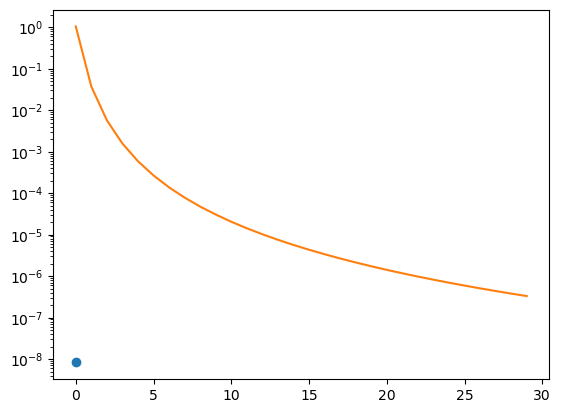

In [151]:
def wynn_epsilon(S):
    n = S.size
    width = n-1
    print(width)
    tableau = np.zeros((n + 1, width + 2))
    tableau[:,0] = 0
    tableau[1:,1] = S.copy() 
    for w in range(2,width + 2):
        for r in range(w,n+1):
            #print(r,w)
            tableau[r,w] = tableau[r-1,w-2] + 1/(tableau[r,w-1] - tableau[r-1,w-1])
    return tableau

n = 30
print(np.cumsum(np.arange(1,n,dtype="float")**-5))
tableau = (wynn_epsilon(np.cumsum(np.arange(1,n,dtype="float")**-5)))
plt.plot(np.abs(1.0369277551433699263-tableau[:,-1][tableau[:,-1]>0]),"o")
plt.semilogy(np.abs(1.0369277551433699263-tableau[:,1]))
print(tableau[:,3])
print(tableau[:,5])



def wynnepsilon(sn, r):
    """Perform Wynn Epsilon Convergence Algorithm"""
    r = int(r)
    n = 2 * r + 1
    e = np.zeros(shape=(n + 1, n + 1))

    for i in range(1, n + 1):
        e[i, 1] = sn[i - 1]

    for i in range(3, n + 2):
        for j in range(3, i + 1):
            e[i - 1, j - 1] = e[i - 2, j - 3] + 1 / (e[i - 1, j - 2] - e[i - 2, j - 2])
#             print(1/np.abs((e[i - 1, j - 2] - e[i - 2, j - 2])))

    er = e[:, 1:n + 1:2]
    return er



def use_wynn_2(sn):
    n = sn.size
    er = wynnepsilon(sn, np.floor((n - 1) / 2))
    return er
    
    
    
    
    





In [153]:
clenshaw_curtis_nodes_weights2(1)

(array([[0.]]), array([2.]))

In [154]:
# def wynn_epsilon(S):
#     n = S.size
#     width = n-1
#     print(width)
#     tableau = np.zeros((n + 1, width + 2))
#     tableau[:,0] = 0
#     tableau[1:,1] = S.copy() 
#     for w in range(2,width + 2):
#         for r in range(w,n+1):
#             #print(r,w)
#             if abs(tableau[r,w-1] - tableau[r-1,w-1]) <=1e-10:
#                 tableau[r,w] = 10**18
#             else:
#                 tableau[r,w] = tableau[r-1,w-2] + 1/(tableau[r,w-1] - tableau[r-1,w-1])
#     return tableau



# def wynnepsilon(sn, r):
#     """Perform Wynn Epsilon Convergence Algorithm"""
#     r = int(r)
#     n = 2 * r + 1
#     e = np.zeros(shape=(n + 1, n + 1))

#     for i in range(1, n + 1):
#         e[i, 1] = sn[i - 1]

#     for i in range(3, n + 2):
#         for j in range(3, i + 1):
#             e[i - 1, j - 1] = e[i - 2, j - 3] + 1 / (e[i - 1, j - 2] - e[i - 2, j - 2])
# #             print(1/np.abs((e[i - 1, j - 2] - e[i - 2, j - 2])))

#     er = e[:, 1:n + 1:2]
#     return er



# def use_wynn_2(sn):
#     n = sn.size
#     er = wynnepsilon(sn, np.floor((n - 1) / 2))
#     return er
    
    
    
    
    




# n = 30
# print(np.cumsum(np.arange(1,n,dtype="float")**-5))
# tableau = (wynn_epsilon(np.cumsum(np.arange(1,n,dtype="float")**-5)))
# plt.plot(np.abs(1.0369277551433699263-tableau[:,-1][tableau[:,-1]>0]),"o")
# plt.semilogy(np.abs(1.0369277551433699263-tableau[:,1]))
# print(tableau[:,3])
# print(tableau[:,5])

In [155]:

clenshaw_curtis_nodes_weights2(10)[0]

array([[-1.        , -0.93969262, -0.76604444, -0.5       , -0.17364818,
         0.17364818,  0.5       ,  0.76604444,  0.93969262,  1.        ]])

In [156]:
clenshaw_curtis_nodes_weights2(16)[0]

array([[-1.        , -0.9781476 , -0.91354546, -0.80901699, -0.66913061,
        -0.5       , -0.30901699, -0.10452846,  0.10452846,  0.30901699,
         0.5       ,  0.66913061,  0.80901699,  0.91354546,  0.9781476 ,
         1.        ]])

In [157]:
def two_point_we(p1,p2):
    return 1/(p2-p1)

[0.         1.25643617 1.2588292  1.25892075 1.25892413] sols
4
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.14525525e+04  0.00000000e+00]
 [-7.58067139e+06  1.25892426e+00]]
2
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25882920e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25892075e+00 1.09231906e+04 0.00000000e+00]
 [0.00000000e+00 1.25892413e+00 2.95832949e+05 1.25892426e+00]] 2pt
1
0.0
3
0.0
5
1.2589242561904757


ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

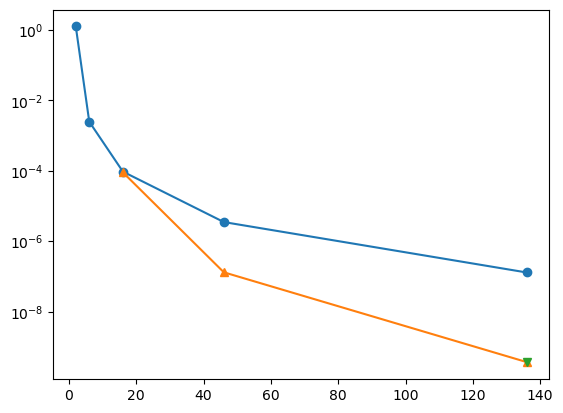

In [158]:
#test integration
def cc_int(f,n):
    x,w = clenshaw_curtis_nodes_weights2(n)
    return np.sum(f(x)*w)

f = lambda x: np.sqrt(1-x**2)*np.exp(-x**2)
# f = lambda x: 10*scipy.special.jv(2, x*100)*np.exp(-x**2)

ns = np.array([2,6,16,46,136])
# ns = nestedvals[0:7]
# ns = np.array([8, 8+14, 8+14+14, 8+14*3, 8+14*4, 8+14*5, 8+14*6])
# ns = np.array([4,10,16,22, 28, 34, 40])
# ns = np.array([7,10,13,16,19,22,25])
# ns = np.array([8, 22, 36, 48,64,128,256 ])

sols = np.zeros(ns.size)
for i,n in enumerate(ns):
    sols[i] = cc_int(f,n)
print(sols,'sols')
true_ans = 1.2589242565517815809
# true_ans = 0.20563131124135862477
tableau = wynn_epsilon(sols)
print(tableau[:,4:8])
my_accelerated = use_wynn_2(sols)
two_pt = wynn_epsilon(sols[-3:])
print(two_pt, '2pt')
# print('###',my_accelerated, "####")
# print(tableau[:,1:8])
#for i in range(sols.size):
    #print("%.10f" % (1.6951187376381606303-sols[i]))
    #print("%.10f" % (1.6951187376381606303-tableau[i,-1]))

processed_ns, processed = wynn_process(tableau, ns)
    
    
plt.semilogy(ns,np.abs(sols-true_ans),"o-", label = 'w/o acceleration')
plt.semilogy(ns[2:],np.abs(true_ans-tableau[3:,3]),"^-", label = 'first column')
plt.semilogy(ns[4:],np.abs(true_ans-tableau[5:,5]),"v-", label = 'second column')
# plt.semilogy(ns[6:],np.abs(true_ans-tableau[7:,7]),"r+-", label = 'last column')
plt.semilogy(ns[5:],np.abs(true_ans-two_pt[3:,3]),"rx-", label = 'three point')

plt.semilogy(processed_ns, np.abs(true_ans-processed),"rs-", label = 'processed')

# plt.semilogy(ns[0:], np.abs(true_ans-my_accelerated[1:,-1]), '--x', label = 'my accelerated')
plt.legend()
# print(np.log10(np.abs(tableau[-2:,-1]-true_ans)))
# print(np.abs(my_accelerated-true_ans))
# print(np.abs(sols-true_ans))
print(tableau[3:,3], 'first')
plt.savefig("wynn_epsilon_test.pdf")

In [192]:
cc_int(f, 20)

1.258877542127784

In [194]:
h = 2.**np.arange(1,-5,-1)
f = lambda x: np.arctan(x)*np.cosh(x)
S = (f(1+h/2)-f(1-h/2))/h
print(S)
tableau = wynn_epsilon(S)
print(tableau[:,2:])

[2.08265507 1.78911232 1.71800451 1.70039511 1.6960039  1.69490681]
5
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-3.40665887e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.40631522e+01  1.69527282e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-5.67878466e+01  1.69459884e+00 -1.49778349e+03  0.00000000e+00
   0.00000000e+00]
 [-2.27728014e+02  1.69454511e+00 -1.86669564e+04  1.69454060e+00
   0.00000000e+00]
 [-9.11500001e+02  1.69454143e+00 -2.72042424e+05  1.69454116e+00
   1.75706750e+06]]


In [196]:
print(tableau)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.08265507e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.78911232e+00 -3.40665887e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.71800451e+00 -1.40631522e+01  1.69527282e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.70039511e+00 -5.67878466e+01  1.69459884e+00
  -1.49778349e+03  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.69600390e+00 -2.27728014e+02  1.69454511e+00
  -1.86669564e+04  1.69454060e+00  0.00000000e+00]
 [ 0.00000000e+00  1.69490681e+00 -9.11500001e+02  1.69454143e+00
  -2.72042424e+05  1.69454116e+00  1.75706750e+06]]


In [198]:
sols

array([0.        , 1.25643617, 1.2588292 , 1.25892075, 1.25892413])

In [200]:
def pi_approx(N):
    res = 0
    for i in range(N):
        res += (-3)**(-i)/(2*i + 1)
    return res * math.sqrt(12)

In [202]:
pi_approx(10)

3.1415905109380797

In [204]:

# n_table = np.array([0,2,3,5,6,7,9,11,12,13,15,17,19,22,24,28,30,35,50])
n_table = np.array([0,1,2,5,6,9, 11, 13, 15])
# n_table = np.array([0,2,4,6,8,10,12,14,16,18,20])
pi_table = np.zeros(len(n_table))
for i in range(0,len(n_table)):
    pi_table[i] = pi_approx(n_table[i])
print(pi_table)

[0.         3.46410162 3.07920144 3.14260475 3.14130879 3.14159977
 3.1415933  3.14159272 3.14159266]


In [206]:
pi_approx(8)

3.141568715941784

In [208]:
aa = fill_in_sequence(n_table, pi_table, 1)

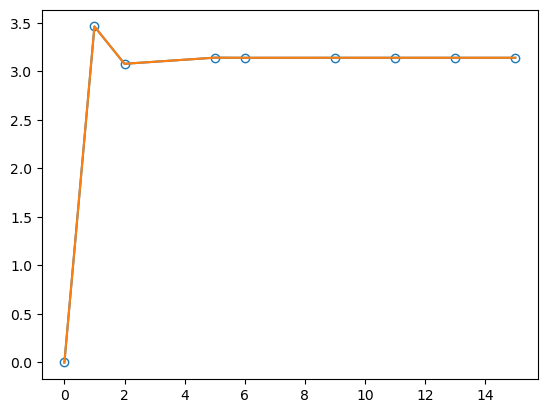

In [210]:

plt.plot(n_table, pi_table, '-o', mfc = 'none')
plt.plot(aa[0], aa[1])

In [212]:
pi_table-math.pi

array([-3.14159265e+00,  3.22508962e-01, -6.23912179e-02,  1.01209207e-03,
       -2.83868127e-04,  7.12022171e-06,  6.50913288e-07,  6.14305868e-08,
        5.93192073e-09])

## 

In [215]:
11//2 + 1

6

In [217]:
# ns, processed_wepi = wynn_oddcolumn_getter(we_pi, np.linspace(1, 11, 10))

In [219]:
print(ns)

[  2   6  16  46 136]


ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

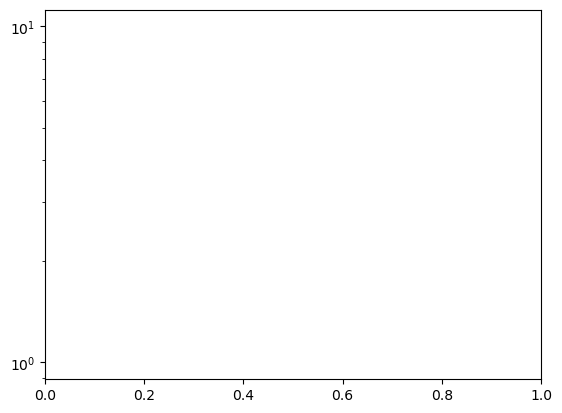

In [221]:

plt.semilogy(np.linspace(1,11,10), np.abs(pi_table-math.pi), '-o', label = 'series')
# plt.semilogy(np.linspace(1,11,10), np.abs(pi_table-math.pi), '-o', label = 'series')
plt.semilogy(np.array([11]), np.abs(math.pi-wynn_epsilon(pi_table)[9:,9][-1]), 'x', label = 'wynn')
plt.semilogy(ns, np.abs(math.pi-processed_wepi), '-^', label = 'wynn')
plt.legend()

In [ ]:
wynn_epsilon(pi_table)[5:,5]

In [224]:
def wynn_oddcolumn_getter(we_results, series_ns):
    ncolumns = we_results[0].size
    if ncolumns%2 ==0:
        n_odd = ncolumns//2
    else:
        n_odd = ncolumns//2+1
    res = np.zeros(n_odd)
    used_ns = np.zeros(n_odd)
    ik = 0
    for i in range(series_ns.size+1):
        if i %2 != 0:
            used_ns[ik] = series_ns[i]
            res[ik] = we_results[i:, i][-1]
            ik += 1
    return used_ns[:-1], res[:-1]
            
    
    

Putting it all together

In [228]:
n_table = np.array([2,4,6,8,10])
n_table_gaps = np.array([2,4,6,8,10])
# n_table = np.array([0,2,4,6,8,10,12,14,16,18,20])
pi_table = np.zeros(len(n_table))
for i in range(0,len(n_table)):
    pi_table[i] = pi_approx(n_table[i])
    
pi_table_2 = np.zeros(len(n_table_gaps))
for i in range(0,len(n_table_gaps)):
    pi_table_2[i] = pi_approx(n_table_gaps[i])
print(pi_table)
dense_pi_table  = fill_in_sequence(n_table_gaps, pi_table_2, 1)
print(dense_pi_table)

[3.07920144 3.13785289 3.14130879 3.14156872 3.14159051]
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), array([3.07920144, 3.10852716, 3.13785289, 3.13958084, 3.14130879,
       3.14143875, 3.14156872, 3.14157961, 3.14159051]))


In [230]:
dense_pi_table  = fill_in_sequence(n_table_gaps, pi_table_2, 1)
# dense_pi_table[1][3] = pi_table[3]
# dense_pi_table[1][5] = pi_table[5]

wynn_dense_pi = wynn_epsilon(dense_pi_table[1])
wynn_sparse_pi = wynn_epsilon(pi_table)

8
4


/var/folders/rp/0g_84zc94fb0x5yys8v55x7m0000gq/T/ipykernel_11590/2504944246.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  tableau[r,w] = tableau[r-1,w-2] + 1/(tableau[r,w-1] - tableau[r-1,w-1])


In [232]:
# dense_pi_table[1]-pi_table

In [234]:
wynn_sparse_pi[5]

array([0.00000000e+00, 3.14159051e+00, 4.58820908e+04, 3.14159251e+00,
       3.81294083e+05, 3.14159259e+00])

8


/var/folders/rp/0g_84zc94fb0x5yys8v55x7m0000gq/T/ipykernel_11590/2504944246.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  tableau[r,w] = tableau[r-1,w-2] + 1/(tableau[r,w-1] - tableau[r-1,w-1])


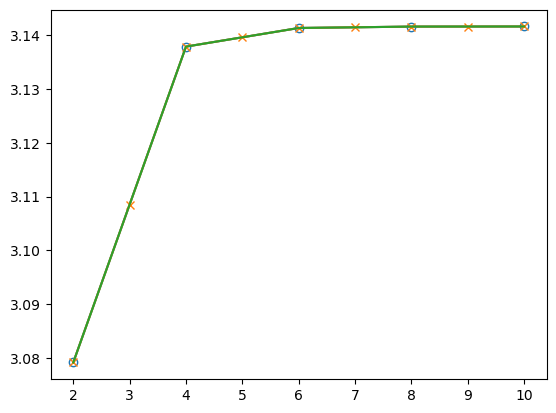

In [256]:
plt.plot(n_table, pi_table, '-o', mfc = 'none')
plt.plot(dense_pi_table[0], dense_pi_table[1], '-x')
interp_p1 = interp1d(n_table, pi_table)
plt.plot(dense_pi_table[0], interp_p1(dense_pi_table[0]))
dense_interpolated = interp_p1(dense_pi_table[0])
wynn_dense_pi_interpolated = wynn_epsilon(dense_interpolated)

In [262]:
wynn_dense_pi_interpolated[1:,1]

array([3.07920144, 3.10852716, 3.13785289, 3.13958084, 3.14130879,
       3.14143875, 3.14156872, 3.14157961, 3.14159051])

In [238]:
ns_dense, res_dense = wynn_process(wynn_dense_pi, dense_pi_table[0])
ns_sparse, res_sparse = wynn_process(wynn_sparse_pi, n_table)

1
0.0
3
0.0
5
0.0
7
0.0
9
3.1419144293099186
1
0.0
3
0.0
5
3.1415925919424574


In [240]:
np.min(np.abs(wynn_dense_pi-math.pi))
np.min(np.abs(wynn_sparse_pi-math.pi))

6.164733568070346e-08

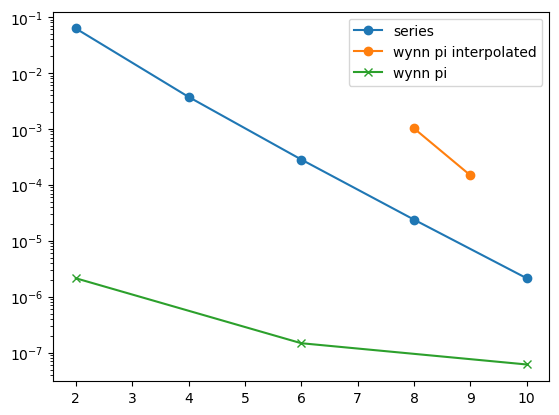

In [282]:
plt.semilogy(n_table, np.abs(pi_table-math.pi), '-o', label = 'series')

plt.semilogy(dense_pi_table[0][8:], np.abs(math.pi-wynn_dense_pi_interpolated[7:,7]), '-o', label = 'wynn pi interpolated')
plt.semilogy(ns_sparse, np.abs(math.pi-res_sparse), '-x', label = 'wynn pi')
plt.legend()

In [ ]:
np.array([15])

In [167]:
wynn_dense_pi[7:,7]-math.pi

NameError: name 'wynn_dense_pi' is not defined

In [ ]:
wynn_oddcolumn_getter(wynn_dense_pi, dense_pi_table[0])

In [168]:
dense_pi_table[0]

NameError: name 'dense_pi_table' is not defined

In [170]:
n_table

array([ 2,  4,  6,  8, 10])

In [172]:
wynn_process(wynn_dense_pi, n_table)

NameError: name 'wynn_dense_pi' is not defined

In [174]:
def wynn_process(wynn, series):
    lastcol = wynn[0].size
    if lastcol %2 ==0:
        lastcol -=1
    res = []
    new_series = []
    it = 0
    for ix in range(wynn[0].size):
        if ix % 2!= 0:
            print(ix)
            res.append(wynn[ix:,ix][-1])
            print(wynn[ix][-1])
            new_series.append(series[it])
            it += 2
    return np.array(new_series), np.array(res)
        